<a href="https://colab.research.google.com/github/radhikaa17/woc5.0-ml-weather-prediction-case-study-Radhika-Singhal/blob/main/WOC_checkpoint_6_and_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202218062

Radhika Singhal

CHECKPOINT 6 and 7

##About the data

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv("/content/weather.csv")

In [98]:
data.shape

(1461, 5)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [100]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [101]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


##Preprocessing

In [102]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [103]:
for i in data.columns:
  print(data[i].value_counts())
  print()

0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      

The data is completely cleaned.

##Data Visualization

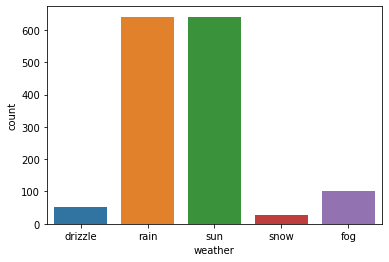

In [104]:
sns.countplot(x='weather',data=data)

We can see the countplot for weather. Mostly, it was rainy and sunny.

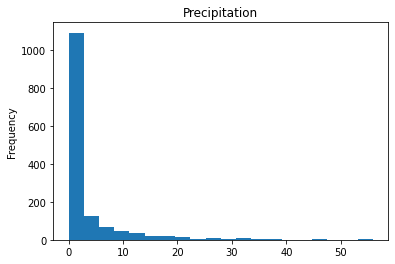

In [105]:
plt.title('Precipitation')
data['precipitation'].plot.hist(bins = 20)

Precipitation is right skewed.
Mostly on all the days precipitation is between 0 to 10

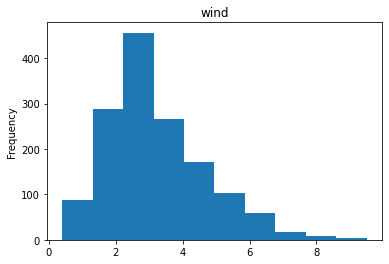

In [106]:
plt.title('wind')
data['wind'].plot.hist()

Wind is following normal distribution and a bit right skewed.

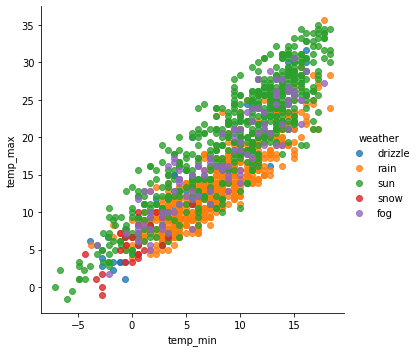

In [107]:
sns.lmplot( x="temp_min", y="temp_max", data=data, fit_reg=False, legend=True,hue='weather')

A perfect positive relationship is forming between minimum temperature and maximum temperature. 

It is showing that on a particular day, if minimum temperature is less, then maximum temperature will be less too.


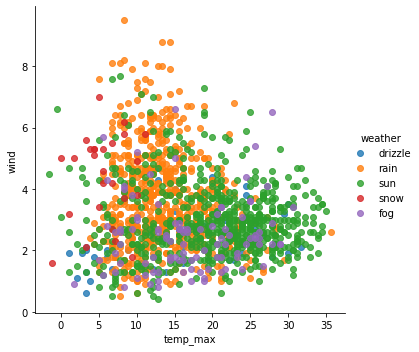

In [108]:
sns.lmplot( x="temp_max", y="wind", data=data, fit_reg=False, legend=True,hue='weather')

We can see that no such relation is there between maximum temperature and wind.

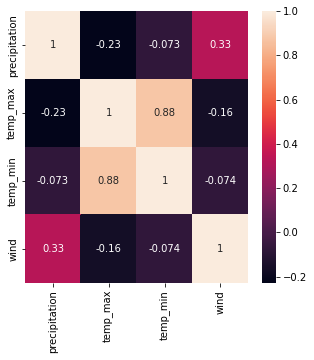

In [109]:
plt.figure(figsize=(5,5))
corr = data.corr()
sns.heatmap(corr,annot=True)

Heatmap is showing the degree of relationship between all the numerical variables.

Negative sign is representing negative relationship and positive is showing positive.

Negative means if one variable increases other tend to decreases.

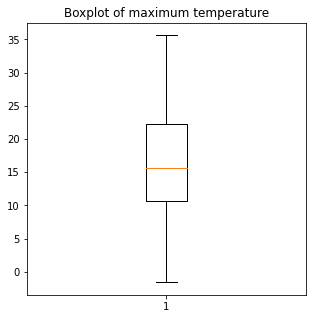

In [110]:
fig = plt.figure(figsize =(5,5))
plt.title('Boxplot of maximum temperature')
plt.boxplot(data['temp_max'])
plt.show()

No outlier in 'temp_max'. Median temperature is around 15 showing that the data is of a cooler place or in starting of winter season.

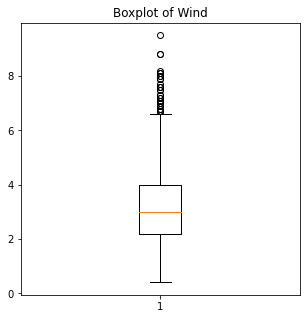

In [111]:
fig = plt.figure(figsize =(5,5))
plt.title('Boxplot of Wind')
plt.boxplot(data['wind'])
plt.show()

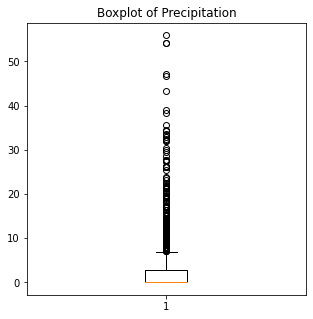

In [112]:
fig = plt.figure(figsize =(5,5))
plt.title('Boxplot of Precipitation')
plt.boxplot(data['precipitation'])
plt.show()

Precipitation and wind are having outliers.

##Modelling

AxesSubplot(0.125,0.125;0.775x0.755)


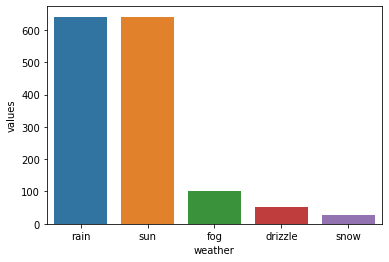

In [113]:
'''label imbalance - An imbalanced classification problem is an example of a classification 
problem where the distribution of examples across the known classes is biased or skewed.

Whenever the output is checked - it will be giving data accuracy, from the Training data
and that they will learn and at the later stage in test data, the output would be given as
the attribute which is present in majority irrespective of the attributes/features and hence
we need to check for Label Imbalance'''

import matplotlib.pyplot as plt
import seaborn as sns
t = data["weather"].value_counts()
t_data = pd.DataFrame({'weather':t.index,'values':t.values})
print(sns.barplot(x='weather',y="values",data=t_data))

In [114]:
#Step1 = Separating features and labels
X = data.drop("weather",axis=1)
y = data["weather"]

In [115]:
'''Step 2 = Fixing the Label Imbalance
we are using random oversampling technique 
In this, it will increase the data for less labels
In undersampling technique, data is reduced, hence we are not using the under sampler'''
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
r = RandomOverSampler()
Xs, ys = r.fit_resample(X, y)
print(Counter(ys))
Xs.shape

Counter({'drizzle': 641, 'rain': 641, 'sun': 641, 'snow': 641, 'fog': 641})


(3205, 4)

In [116]:
'''Step 3 = Feature Scaling: to normalize data
X_r = feature dataset
MinMax scaler scales the dataset so that all the features lie between 0 and 1
'''
from sklearn.preprocessing import MinMaxScaler 
x_scaler = MinMaxScaler()
x_scaler.fit(Xs)
cols = Xs.columns
Xs[cols] = x_scaler.transform(Xs)

In [117]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xs, ys, test_size= 0.30,shuffle = True,random_state=42)
# 30% data for testing and 70% for training
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (2243, 4)
X_test dimension=  (962, 4)
y_train dimension=  (2243,)
y_train dimension=  (962,)


In [118]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection

##Decision Trees

In [119]:
from sklearn import tree

In [126]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=25)
model.fit(X_train, y_train) #training the model
y_pred = model.predict(X_test) #predicting the labels of test set
count_misclassified = (y_test != y_pred).sum() #counting how many predictions made by the model were incorrect
print('Misclassified samples: ', count_misclassified)
accuracy = metrics.accuracy_score(y_test, y_pred) #finding the accuracy of the model 
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples:  78
Accuracy: 0.92


Accuracy of Decision trees is 92% at maximum depth = 25

Before and after this, accuracy is reducing.

CONFUSION MATRIX =  The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [121]:
def conf_mat(y_test,y_pred): #function for printing confusion matrix
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  print(pd.crosstab(y_test,y_pred))
  #print accuracy of model
  print(metrics.accuracy_score(y_test,y_pred))

In [122]:
conf_mat(y_test,y_pred) #on yaxis = True label, xaxis = predicted label

col_0    drizzle  fog  rain  snow  sun
weather                               
drizzle      187    0     0     0    0
fog            0  192     0     0    0
rain           1    3   172     6    6
snow           0    0     0   193    0
sun           21   28    12     0  141
0.91995841995842


##KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier
model2 = knn(n_neighbors=3)
model2.fit(X_train, y_train) #training the model
y_pred = model2.predict(X_test) #predicting the labels of test set
count_misclassified = (y_test != y_pred).sum() #counting how many predictions made by the model were incorrect
print('Misclassified samples: ', count_misclassified)
accuracy = metrics.accuracy_score(y_test, y_pred) #finding the accuracy of the model 
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples:  143
Accuracy: 0.85


In [124]:
conf_mat(y_test,y_pred)

col_0    drizzle  fog  rain  snow  sun
weather                               
drizzle      187    0     0     0    0
fog            0  190     2     0    0
rain           7   12   135     5   29
snow           0    0     0   193    0
sun           24   33    25     6  114
0.8513513513513513


We can see that both KNN and Decision trees predicted wrong mostly for sun.